<a href="https://colab.research.google.com/github/rhanilham/PCVK/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Masukkan nilai kecerahan: 100


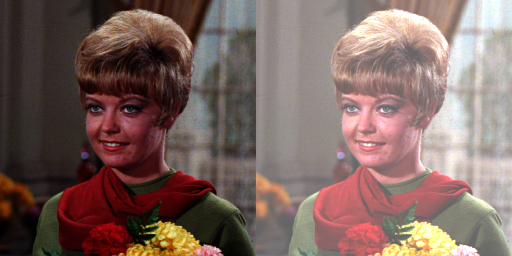

In [67]:
# Masukkan nilai kecerahan
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print("Error, not a number")

# Baca gambar
original = cv.imread('/content/drive/MyDrive/PCVK/Week3/girl.png')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per piksel untuk mengubah tingkat kecerahan
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# Gabungkan gambar asli dan gambar yang sudah diubah kecerahannya
final_frame = cv.hconcat([original, brightness_image])

# Tampilkan hasil
cv2_imshow(final_frame)

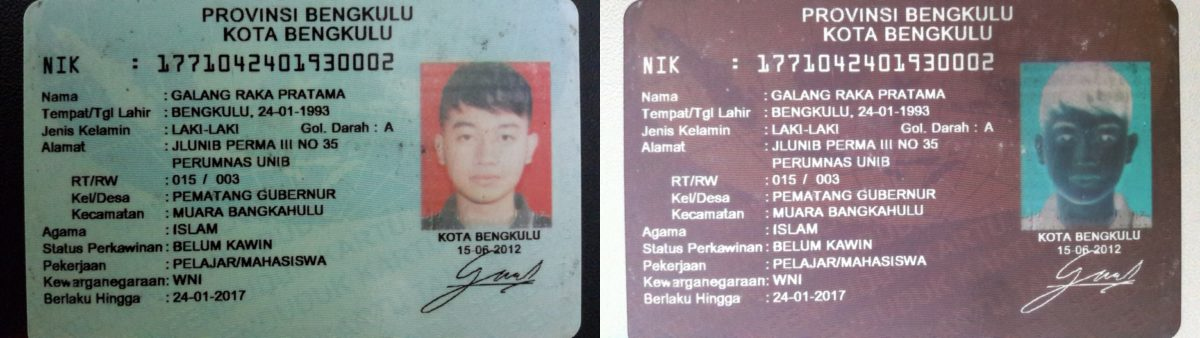

In [68]:
# Baca gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Week3/ktp.png')

# Inversi citra menggunakan formula I' = 255 - I
inverse_image = 255 - image

# Gabungkan gambar asli dan gambar yang di-inversi
final_frame = cv.hconcat([image, inverse_image])

# Tampilkan hasil
cv2_imshow(final_frame)

Masukkan tingkat kecerahan [-255 - 255]: 100
Masukkan kontras [1.0 - 3.0]: 2


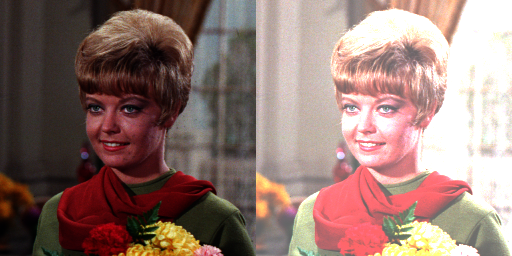

In [69]:
# Fungsi untuk mengubah kontras dan kecerahan
def adjust_contrast_brightness(image, contrast, brightness):
    # Pastikan nilai kontras dan kecerahan berada dalam rentang yang valid
    contrast = min(max(contrast, 1.0), 3.0)
    brightness = min(max(brightness, -255), 255)

    # Menerapkan transformasi kontras dan kecerahan
    adjusted_image = cv.convertScaleAbs(image, alpha=contrast, beta=brightness)
    return adjusted_image

# Membaca gambar dari file
image = cv.imread('/content/drive/MyDrive/PCVK/Week3/girl.png')

# Meminta input dari pengguna
brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

# Mengubah kontras dan kecerahan gambar
adjusted_image = adjust_contrast_brightness(image, contrast, brightness)

# Gabungkan gambar asli dan gambar yang sudah diubah
final_frame = cv.hconcat([image, adjusted_image])

# Tampilkan hasil
cv2_imshow(final_frame)

Masukkan nilai kecerahan: 100


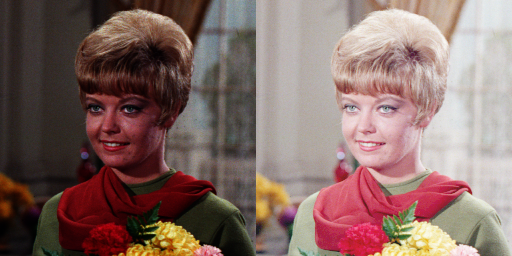

In [70]:
# Fungsi untuk menerapkan transformasi logaritmik pada citra
def log_transform(image, c):
    # Konversi citra ke format float
    image = np.float32(image)

    # Terapkan transformasi logaritmik
    result = c * np.log(1 + image)

    # Normalisasi hasil sehingga berada dalam rentang 0 hingga 255
    result = np.uint8(255 * result / np.max(result))

    return result

# Membaca gambar dari file
image = cv.imread('/content/drive/MyDrive/PCVK/Week3/girl.png')

# Masukkan nilai kecerahan dari user
c = float(input("Masukkan nilai kecerahan: "))

# Terapkan transformasi logaritmik
output_image = log_transform(image, c)

# Gabungkan gambar asli dan gambar yang sudah diubah
final_frame = cv.hconcat([image, output_image])

# Tampilkan hasil
cv2_imshow(final_frame)

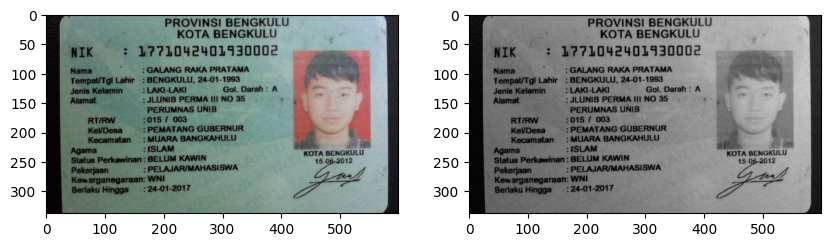

In [71]:
# Memuat gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Week3/ktp.png')

# Mengubah gambar ke tipe float32 untuk presisi
image_float = image.astype(np.float32)

# Menghitung gambar grayscale menggunakan averaging
grayscale_avg = np.mean(image_float, axis=2)

# Mengubah gambar grayscale ke tipe uint8
grayscale_avg = np.uint8(grayscale_avg)

# Mengubah ukuran gambar grayscale agar sesuai dengan ukuran gambar asli
grayscale_avg = cv.resize(grayscale_avg, (image.shape[1], image.shape[0]))

# Menyiapkan subplot
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

# Menampilkan gambar grayscale
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(grayscale_avg, cv.COLOR_GRAY2RGB))
plt.axis('on')

plt.show()

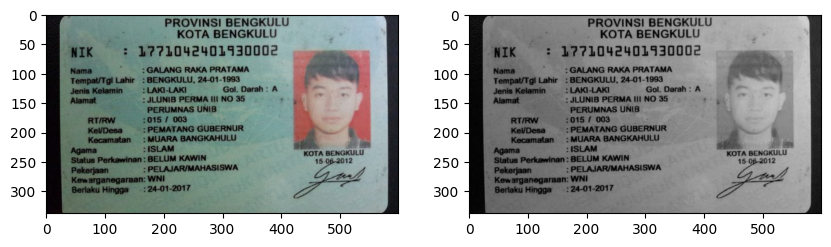

In [72]:
# Memuat gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Week3/ktp.png')

# Mengubah gambar ke tipe float32 untuk presisi
image_float = image.astype(np.float32)

# Menghitung gambar grayscale menggunakan lightness
max_channel = np.max(image_float, axis=2)
min_channel = np.min(image_float, axis=2)
grayscale_lightness = (max_channel + min_channel) / 2

# Mengubah gambar grayscale ke tipe uint8
grayscale_lightness = np.uint8(grayscale_lightness)

# Mengubah ukuran gambar grayscale agar sesuai dengan ukuran gambar asli
grayscale_lightness = cv.resize(grayscale_lightness, (image.shape[1], image.shape[0]))

# Menyiapkan subplot
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

# Menampilkan gambar grayscale
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(grayscale_lightness , cv.COLOR_GRAY2RGB))
plt.axis('on')

plt.show()

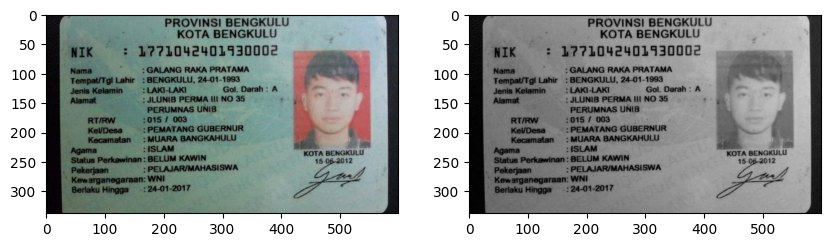

In [73]:
# Memuat gambar
image = cv.imread('/content/drive/MyDrive/PCVK/Week3/ktp.png')

# Mengubah gambar ke tipe float32 untuk presisi
image_float = image.astype(np.float32)

# Menghitung gambar grayscale menggunakan luminance
R, G, B = image_float[:, :, 2], image_float[:, :, 1], image_float[:, :, 0]
grayscale_luminance = 0.21 * R + 0.72 * G + 0.07 * B

# Mengubah gambar grayscale ke tipe uint8
grayscale_luminance = np.uint8(grayscale_luminance)

# Mengubah ukuran gambar grayscale agar sesuai dengan ukuran gambar asli
grayscale_luminance = cv.resize(grayscale_luminance, (image.shape[1], image.shape[0]))

# Menyiapkan subplot
plt.figure(figsize=(10, 5))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('on')

# Menampilkan gambar grayscale
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(grayscale_luminance, cv.COLOR_GRAY2RGB))
plt.axis('on')

plt.show()